In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandaludewthilini
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.42MB/s]

In [4]:
data = pd.read_csv("random-linear-regression/test.csv")

In [5]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
data.shape

(300, 2)

In [7]:
x= data['x']
y= data['y']

In [8]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


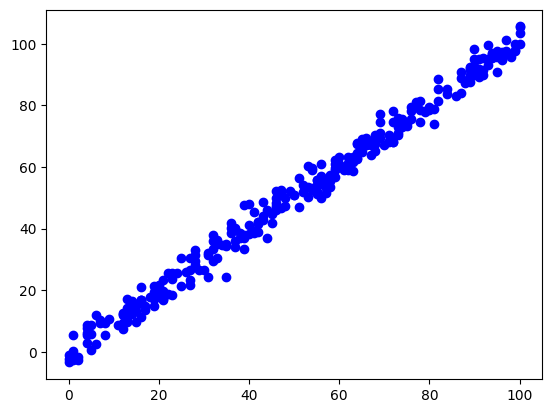

In [9]:
plt.scatter(x,y, c='b')
plt.show()

In [10]:
#best fit line
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train.shape, x_test.shape

((240,), (60,))

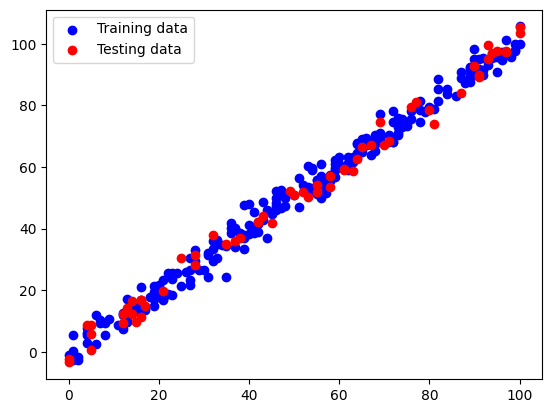

In [13]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='r', label='Testing data')
plt.legend()
plt.show()

#Model building



In [49]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#compile model
# Changed 'lr' to 'learning_rate' in Adam optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics=['mae'])

#fit model train model
epoch_number = 10
history = model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 44.8354 - mae: 44.8354
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.9598 - mae: 14.9598 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.2198 - mae: 11.2198 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0724 - mae: 7.0724 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3796 - mae: 6.3796   
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9021 - mae: 3.9021
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5547 - mae: 3.5547
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6769 - mae: 3.6769  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0495 - mae: 3.0495 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6408 - mae: 2.6408 


In [42]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [43]:
y_prediction = model.predict(x_test)
y_prediction[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[85.88602  ],
       [72.50415  ],
       [89.7094   ],
       [ 4.6390705],
       [86.841835 ]], dtype=float32)

In [44]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


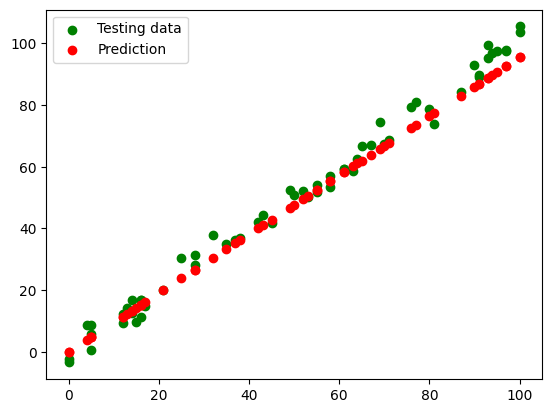

In [45]:
#plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='g', label='Testing data')
plt.scatter(x_test, y_prediction, c='r', label='Prediction')
plt.legend()
plt.show()

In [46]:
model.evaluate(x_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.6348 - mae: 3.6348 


[3.395275354385376, 3.395275354385376]

In [47]:
y_prediction.shape

(60, 1)

In [48]:
y_test.shape

(60,)

In [50]:
history.history

{'loss': [34.55490493774414,
  12.865971565246582,
  9.100933074951172,
  6.339348793029785,
  5.202658176422119,
  3.915961265563965,
  3.5242769718170166,
  3.711423397064209,
  3.037986993789673,
  2.767127513885498],
 'mae': [34.55490493774414,
  12.865971565246582,
  9.100933074951172,
  6.339348793029785,
  5.202658176422119,
  3.915961265563965,
  3.5242769718170166,
  3.711423397064209,
  3.037986993789673,
  2.767127513885498]}

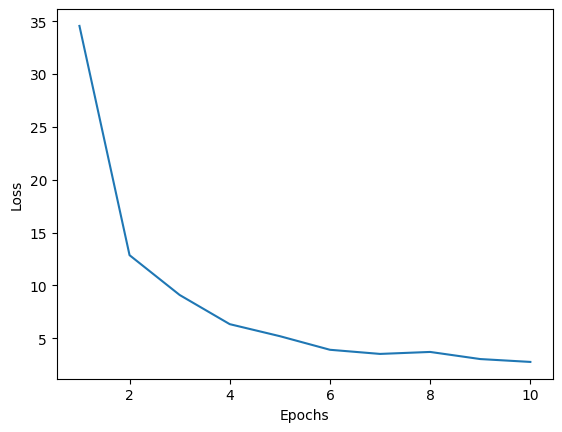

In [51]:
x_range = range(1, epoch_number+1)
plt.plot(x_range, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()